In [216]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors

import torch as t
import torch_geometric as ptgeo

from torch_geometric.utils import to_networkx, from_networkx
import networkx as nx

from gninvert.functions import run_GN, gn_time_series, make_color_scale,\
gdisplay, run_and_draw, generate_training_data,\
generate_graphs_from_connections, generate_grid_edge_index
from gninvert.gns import MultiDiffusionGN, EquationGN, ActivatorInhibitorGN
from gninvert.gnns import LinearGNN
from gninvert.graph_compare import graph_compare, model_compare, model_steps_compare
from gninvert.data_generation import get_TrainingData
from gninvert.gnns import GNN_3Layer
from gninvert.training import fit
from gninvert.hyperparamsearch import hpsearch
import gninvert

import ipywidgets as widgets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
plt.rcParams['figure.figsize'] = [10, 4] # set plot size below

In [95]:
gn = ActivatorInhibitorGN(0.16, 0.10, 0.3)
gdata = generate_graphs_from_connections(
    generate_grid_edge_index(6),
    node_feature_num=3,
    num=1
)[0]

# make the cell sizes homogenous
gdata.x[:, 0] = 0.5

# activator/inhibitor all start in one corner
gdata.x[:, 1] = 0
gdata.x[:, 2] = 0
gdata.x[0, 1] = 4
gdata.x[1, 1] = 1
gdata.x[0, 2] = 4
gdata.x[1, 2] = 1

time_series = gn_time_series(gn, 300, gdata)

In [96]:
def f(x):
    gdisplay(
        time_series[x],
        color_scales = [
            make_color_scale(0, 1, plt.cm.Greys),
            make_color_scale(0, 1, plt.cm.BuGn),
            make_color_scale(0, 1, plt.cm.Reds)
        ]
    )
    print(x)

widgets.interact(
    f,
    x=widgets.IntSlider(min=0, max=len(time_series)-1, step=1, value=0)
)

interactive(children=(IntSlider(value=0, description='x', max=300), Output()), _dom_classes=('widget-interact'…

<function __main__.f(x)>

In [187]:
params = {
    'starting_lr': [1e-1, 5e-2],
    'lr_scheduler_dec_factor': [0.2],
    'lr_scheduler_patience': [20],
    'lr_scheduler_cooldown': [10],
    'batch_size': [10, 50],
    'adam_weight_decay': [5e-8],
    'epochs': [500],
    'loss_func': [t.nn.L1Loss(), t.nn.MSELoss()],
    'regularization_coefficient': [False, 1e-5, 1e-3],
    'regularization_norm': [1, 2]
}

In [188]:
results = hpsearch(
    params,
    model_constructor = lambda : GNN_3Layer(node_features=3, message_features=3, hidden_size=10, final_gelu = False),
    model_score_fn = lambda model : model_steps_compare(model, gn, gdata)['absolute']['avg_difs'][-1],
    training_data = get_TrainingData(gn)
)

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [194]:
t.save(results, 'act-inh-hp-results')

In [199]:
[(results[i]['val_loss_history'][-1], results[i]['score']) for i in range(20)]

[(12.160135269165039, 0.253412663936615),
 (11.907604217529297, 0.3613283634185791),
 (12.036587715148926, 0.3895931541919708),
 (12.419591903686523, 0.39027583599090576),
 (11.964486122131348, 0.3928111791610718),
 (12.28510856628418, 0.4564442038536072),
 (267.87237548828125, 0.4783591032028198),
 (138.570068359375, 0.5132623314857483),
 (1334.86328125, 0.5170754790306091),
 (1610.4862060546875, 0.5179049372673035),
 (1608.7225341796875, 0.5183786749839783),
 (39.209354400634766, 0.5187198519706726),
 (12.250833511352539, 0.5217769742012024),
 (137.64024353027344, 0.5466455817222595),
 (133.62071228027344, 0.5490640997886658),
 (1573.0972900390625, 0.5518168210983276),
 (1353.137939453125, 0.5607702136039734),
 (12.135756492614746, 0.581545352935791),
 (435.3558349609375, 0.5965348482131958),
 (133.24232482910156, 0.630486249923706)]

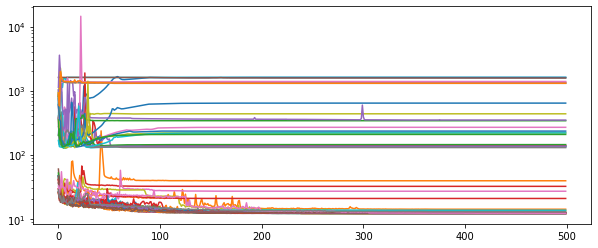

In [189]:
plots = [res['val_loss_history'] for res in results]
for p in plots:
    plt.plot(p)
plt.yscale('log')

Stats for 20 steps for node features:
Greatest relative difference: 15996157.8125%
Average relative difference: 552524.0019607544%
Smallest relative difference: 100.01331567764282%
Greatest absolute difference: 21.569419860839844
Average absolute difference: 0.18669495736248792
Smallest absolute difference: 4.678452114603715e-06%


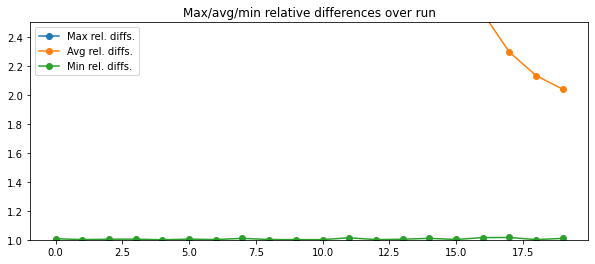

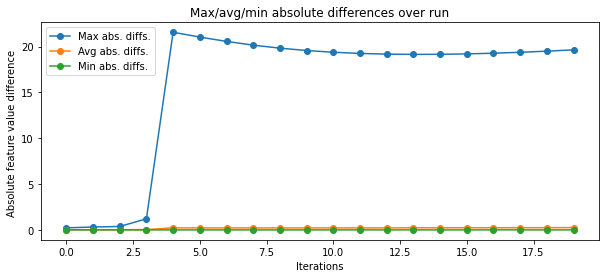

The model being tested finished the run outputting this graph:


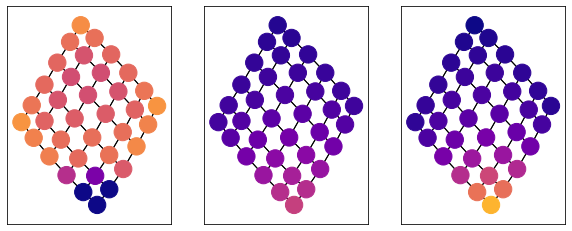

tensor([[-3.6351e+00,  4.7608e-01,  8.3255e-01],
        [-3.0257e-01,  4.1661e-01,  6.4543e-01],
        [ 4.1556e-01,  3.2422e-01,  4.1290e-01],
        [ 6.8552e-01,  2.2972e-01,  2.3495e-01],
        [ 6.9158e-01,  1.5320e-01,  1.2686e-01],
        [ 7.4777e-01,  1.0563e-01,  6.1770e-02],
        [-2.4361e-01,  4.1350e-01,  6.3613e-01],
        [ 2.4271e-01,  3.6465e-01,  5.0281e-01],
        [ 6.1972e-01,  2.8695e-01,  3.3418e-01],
        [ 6.2905e-01,  2.0646e-01,  2.0614e-01],
        [ 5.9618e-01,  1.4070e-01,  1.2590e-01],
        [ 6.5472e-01,  9.9462e-02,  7.2024e-02],
        [ 5.6474e-01,  3.1756e-01,  3.9618e-01],
        [ 6.4509e-01,  2.8317e-01,  3.2585e-01],
        [ 6.3588e-01,  2.2680e-01,  2.3498e-01],
        [ 5.7435e-01,  1.6692e-01,  1.6261e-01],
        [ 5.4726e-01,  1.1700e-01,  1.1007e-01],
        [ 6.1523e-01,  8.4691e-02,  6.6764e-02],
        [ 7.1740e-01,  2.2081e-01,  2.1831e-01],
        [ 6.3452e-01,  2.0004e-01,  1.9594e-01],
        [ 5.7357e-01

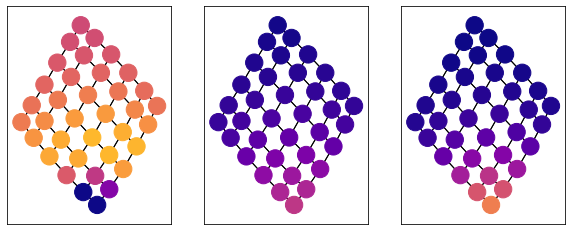

tensor([[-2.3280e+01,  4.4410e-01,  6.8289e-01],
        [-3.0953e-01,  3.8660e-01,  5.4899e-01],
        [ 5.6463e-01,  2.9345e-01,  3.5644e-01],
        [ 8.0276e-01,  1.9588e-01,  1.8861e-01],
        [ 7.4677e-01,  1.1983e-01,  8.3681e-02],
        [ 6.7331e-01,  7.9422e-02,  3.7924e-02],
        [ 2.6579e-01,  3.8326e-01,  5.3660e-01],
        [ 4.5221e-01,  3.3332e-01,  4.3039e-01],
        [ 8.0780e-01,  2.5252e-01,  2.7816e-01],
        [ 8.1500e-01,  1.6802e-01,  1.4618e-01],
        [ 7.2308e-01,  1.0230e-01,  6.4227e-02],
        [ 6.4828e-01,  6.7438e-02,  2.8730e-02],
        [ 7.7291e-01,  2.8584e-01,  3.3369e-01],
        [ 8.4305e-01,  2.4811e-01,  2.6644e-01],
        [ 8.4546e-01,  1.8721e-01,  1.7068e-01],
        [ 7.6786e-01,  1.2376e-01,  8.8518e-02],
        [ 6.6942e-01,  7.4621e-02,  3.8173e-02],
        [ 6.0528e-01,  4.8652e-02,  1.6652e-02],
        [ 8.3907e-01,  1.8557e-01,  1.6624e-01],
        [ 8.2008e-01,  1.6057e-01,  1.3187e-01],
        [ 7.6380e-01

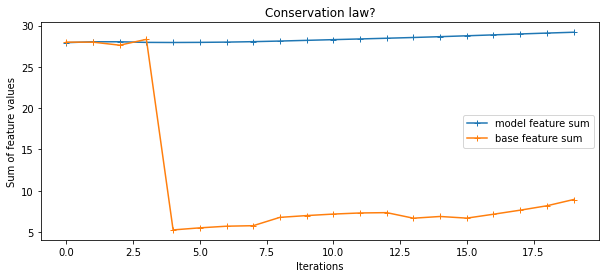

(Data(x=[36, 3], edge_index=[2, 120]), Data(x=[36, 3], edge_index=[2, 120]))

In [191]:
model_compare(results[0]['model'], gn, gdata)

In [213]:
time_series = gn_time_series(gn, 10, gdata)
time_series_pred = gn_time_series(results_m2[0]['model'], 10, gdata)

In [214]:
def g(x):
    gdisplay(
        time_series[x],
        color_scales = [
            make_color_scale(0, 1, plt.cm.Greys),
            make_color_scale(0, 1, plt.cm.BuGn),
            make_color_scale(0, 1, plt.cm.Reds)
        ]
    )
    gdisplay(
        time_series_pred[x],
        color_scales = [
            make_color_scale(0, 1, plt.cm.Greys),
            make_color_scale(0, 1, plt.cm.BuGn),
            make_color_scale(0, 1, plt.cm.Reds)
        ]
    )
    print(x)

widgets.interact(
    g,
    x=widgets.IntSlider(min=0, max=len(time_series)-1, step=1, value=0)
)

interactive(children=(IntSlider(value=0, description='x', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.g(x)>

In [209]:
params2 = params
params2['epochs'] = [150]


In [210]:
params2

{'starting_lr': [0.1, 0.05],
 'lr_scheduler_dec_factor': [0.2],
 'lr_scheduler_patience': [20],
 'lr_scheduler_cooldown': [10],
 'batch_size': [10, 50],
 'adam_weight_decay': [5e-08],
 'epochs': [150],
 'loss_func': [L1Loss(), MSELoss()],
 'regularization_coefficient': [False, 1e-05, 0.001],
 'regularization_norm': [1, 2]}

In [211]:
results_m2 = hpsearch(
    params2,
    model_constructor = lambda : GNN_3Layer(node_features=3, message_features=2, hidden_size=10, final_gelu = False),
    model_score_fn = lambda model : model_steps_compare(model, gn, gdata)['absolute']['avg_difs'][-1],
    training_data = get_TrainingData(gn)
)

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

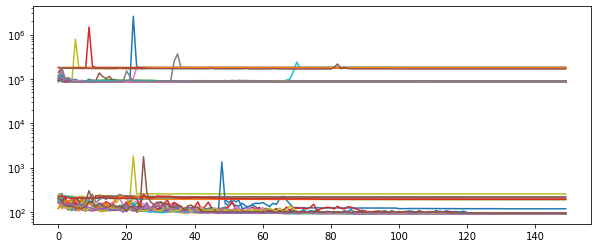

In [212]:
plots = [res['val_loss_history'] for res in results_m2]
for p in plots:
    plt.plot(p)
plt.yscale('log')